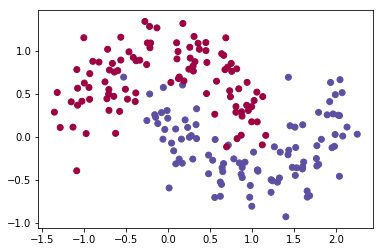

In [2]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

np.random.seed(0)
data, label = datasets.make_moons(200, noise=0.20)

'''二分类只需要一个输出节点，多分类需要超过三个节点，label初始化方法如下
t = np.zeros((X.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1'''

a = np.ones(len(data)).reshape(-1,1)
data = np.hstack((data, a))
plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.Spectral)
plt.show()

In [3]:
class NeuralNetwork():
    
    def __init__(self, data, true_label):
        self.data = data
        self.true_label = true_label
        
    def sigmod(self, x):
        sigmod = 1/(1+np.exp(-x))
        return sigmod
        
    def layer_1(self):
        self.net_1 = np.dot(self.data, self.w1)
        self.A_1 = self.sigmod(self.net_1)
    
    def layer_2(self):
        self.layer_1()
        self.net_2 = np.dot(self.A_1, self.w2)
        self.A_2 = self.sigmod(self.net_2)
        
    def predict(self, w1, w2):
        self.w1 = w1
        self.w2 = w2
        self.layer_2()
        self.pred = []
        for i in range(len(self.A_2)):
            if self.A_2[i] >= 0.5:
                self.pred.append(1)
            else:
                self.pred.append(0)
        return self.pred
    
    def score(self):
        score = 0
        self.f_index = []
        for i in range(len(self.pred)):
            if self.pred[i] == self.true_label[i]:
                score += 1
            else:
                self.f_index.append(i)
        score /= len(self.pred)
        return score
        
    def performance(self):
        Ed = np.sum((self.A_2 - self.true_label)**2)
        return Ed
    
    def rand_gradient(self):
        rand_index = np.random.choice(self.f_index)
        a = (self.A_2[rand_index] - self.true_label[rand_index])*self.A_2[rand_index]*(1-self.A_2[rand_index])
        grad_w2 = (a*self.A_1[rand_index]).reshape(-1,1)
        grad_w1 = a*self.w2*self.A_1[rand_index]*(1-self.A_1[rand_index])*self.data[rand_index]
        return grad_w2, grad_w1

In [4]:
w_1 = np.ones((3,3))-2
w_2 = np.ones(3).reshape(-1,1)
alpha = 0.01
n = 100000

nn = NeuralNetwork(data, label)

for i in range(n):
    pred = nn.predict(w_1, w_2)
    score = nn.score()
    performance = nn.performance()
    print(i, '      ', score, '       ', performance)
    grad = nn.rand_gradient()
    if score < 0.865:
        w_1 -= alpha*grad[1]
        w_2 -= alpha*grad[0]
    else:
        break
print(w_1, w_2)


0        0.5         10836.401216294016
1        0.5         10836.047730657414
2        0.5         10835.780327838684
3        0.5         10835.107967537839
4        0.5         10834.827141663323
5        0.5         10834.546460419897
6        0.5         10834.31717064059
7        0.5         10833.903326268603
8        0.5         10833.108516178636
9        0.5         10832.437955253536
10        0.5         10831.767852096144
11        0.5         10831.488467858717
12        0.5         10830.711627199273
13        0.5         10830.369294566313
14        0.5         10829.72328813658
15        0.5         10829.472607495058
16        0.5         10828.647394530797
17        0.5         10828.015107334275
18        0.5         10827.374780150545
19        0.5         10826.730728599361
20        0.5         10825.89255541368
21        0.5         10825.071823664739
22        0.5         10824.789377334548
23        0.5         10823.908696262695
24        0.5         10823.5

260        0.5         10721.324781010635
261        0.5         10721.137484445757
262        0.5         10720.63422213414
263        0.5         10720.06036005282
264        0.5         10719.428279402151
265        0.5         10719.215669953956
266        0.5         10718.944948066648
267        0.5         10718.610271705635
268        0.5         10718.348123273008
269        0.5         10718.114965928522
270        0.5         10717.812005400425
271        0.5         10717.397056625807
272        0.5         10717.245314851942
273        0.5         10716.890169822653
274        0.5         10716.20628016218
275        0.5         10715.996074079
276        0.5         10715.699061012638
277        0.5         10714.959008003774
278        0.5         10714.144141946526
279        0.5         10713.794869862339
280        0.5         10713.58542596091
281        0.5         10712.854867216996
282        0.5         10712.509138001358
283        0.5         10712.249459340299

492        0.5         10623.72102039487
493        0.5         10622.93512876783
494        0.5         10622.55568609413
495        0.5         10622.255943550104
496        0.5         10622.020357776217
497        0.5         10621.574159099982
498        0.5         10621.034546591007
499        0.5         10620.38072407372
500        0.5         10619.634059938355
501        0.5         10619.425081840267
502        0.5         10618.97134514882
503        0.5         10618.722303710638
504        0.5         10618.417663592116
505        0.5         10618.237698981231
506        0.5         10618.073085344518
507        0.5         10617.914344293993
508        0.5         10617.756214062658
509        0.5         10617.206122942438
510        0.5         10616.973156341413
511        0.5         10616.76035069512
512        0.5         10616.533572746332
513        0.5         10616.325811769448
514        0.5         10616.065341596295
515        0.5         10615.84533992755

692        0.5         10545.87226750422
693        0.5         10545.287149181042
694        0.5         10545.072918000782
695        0.5         10544.321869950196
696        0.5         10543.608341502088
697        0.5         10543.255591895597
698        0.5         10542.943079982002
699        0.5         10542.72959595547
700        0.5         10542.55097028111
701        0.5         10541.712321340077
702        0.5         10540.891965742961
703        0.5         10540.620642633354
704        0.5         10540.342565557836
705        0.5         10539.504250383132
706        0.5         10539.286320718296
707        0.5         10538.57518043063
708        0.5         10537.836260861312
709        0.5         10537.566063876106
710        0.5         10537.295076638493
711        0.5         10536.95096587511
712        0.5         10536.784656861297
713        0.5         10536.106102556008
714        0.5         10535.560946264517
715        0.5         10535.3627798324

892        0.5         10470.320741259744
893        0.5         10470.179894776109
894        0.5         10470.042977657682
895        0.5         10469.830443052153
896        0.5         10469.693640798516
897        0.5         10469.50992473699
898        0.5         10469.068288996183
899        0.5         10468.475494331673
900        0.5         10468.339015440928
901        0.5         10468.150081639804
902        0.5         10467.83481960579
903        0.5         10467.686782376935
904        0.5         10467.522425028177
905        0.5         10467.325085450882
906        0.5         10466.613079581643
907        0.5         10466.322130287597
908        0.5         10466.067243400688
909        0.5         10465.818773506093
910        0.5         10465.633484866468
911        0.5         10465.397500008377
912        0.5         10464.866861652054
913        0.5         10464.561673475553
914        0.5         10464.434035261578
915        0.5         10464.2775409

1091        0.5         10408.35232452742
1092        0.5         10407.857563502992
1093        0.5         10407.73805030893
1094        0.5         10407.55181727025
1095        0.5         10407.062833119224
1096        0.5         10406.84929701074
1097        0.5         10406.414790242608
1098        0.5         10405.86212459496
1099        0.5         10405.65590033916
1100        0.5         10405.540983081375
1101        0.5         10405.060554423751
1102        0.5         10404.894493258453
1103        0.5         10404.74188977223
1104        0.5         10403.988692682105
1105        0.5         10403.61917347741
1106        0.5         10403.334373952572
1107        0.5         10402.709120852038
1108        0.5         10402.211786695787
1109        0.5         10401.748105940942
1110        0.5         10401.530298830756
1111        0.5         10401.405699880239
1112        0.5         10401.224334783108
1113        0.5         10400.81328599995
1114        0.5     

1306        0.5         10345.05782639343
1307        0.5         10344.917831818011
1308        0.5         10344.224454539688
1309        0.5         10344.113524204093
1310        0.5         10343.561274283951
1311        0.5         10343.135829526294
1312        0.5         10342.83000513653
1313        0.5         10342.31161389932
1314        0.5         10341.826614595191
1315        0.5         10341.68744264121
1316        0.5         10341.206856266912
1317        0.5         10341.102189500487
1318        0.5         10340.933824179505
1319        0.5         10340.629171020384
1320        0.5         10339.98122524575
1321        0.5         10339.67704195289
1322        0.5         10339.527340299923
1323        0.5         10339.282045663836
1324        0.5         10339.157588298734
1325        0.5         10338.784257182308
1326        0.5         10338.631725837695
1327        0.5         10338.47778712227
1328        0.5         10337.999540650344
1329        0.5   

1591        0.5         10268.545145779763
1592        0.5         10268.419655507627
1593        0.5         10267.765901821635
1594        0.5         10267.47525407321
1595        0.5         10266.981026423135
1596        0.5         10266.88449519433
1597        0.5         10266.756866966982
1598        0.5         10266.461597138505
1599        0.5         10266.341125498515
1600        0.5         10266.247266853217
1601        0.5         10266.041144968756
1602        0.5         10265.916403675592
1603        0.5         10265.806581593784
1604        0.5         10265.657942935737
1605        0.5         10265.558149286211
1606        0.5         10265.473176513202
1607        0.5         10265.078553314763
1608        0.5         10264.908314986667
1609        0.5         10264.78095701641
1610        0.5         10264.667132014307
1611        0.5         10264.561924849346
1612        0.5         10264.273367038752
1613        0.5         10264.149647584198
1614        0.

1791        0.5         10226.56601672442
1792        0.5         10226.50736316423
1793        0.5         10226.39515214124
1794        0.5         10226.315248220133
1795        0.5         10226.239827149453
1796        0.5         10225.967710391655
1797        0.5         10225.855373478964
1798        0.5         10225.583518816604
1799        0.5         10225.171270878214
1800        0.5         10224.721116214456
1801        0.5         10223.992429934186
1802        0.5         10223.89811158716
1803        0.5         10223.83987173622
1804        0.5         10223.766839813406
1805        0.5         10223.318021459
1806        0.5         10222.735106525664
1807        0.5         10222.659459033965
1808        0.5         10222.295463179704
1809        0.5         10221.77228003616
1810        0.5         10221.67677230084
1811        0.5         10221.323157612673
1812        0.5         10221.229527845515
1813        0.5         10220.942622469234
1814        0.5      

1990        0.5         10186.662146618573
1991        0.5         10186.379030256458
1992        0.5         10186.20741391886
1993        0.5         10186.142267560412
1994        0.5         10185.975306666036
1995        0.5         10185.90273007311
1996        0.5         10185.832029290641
1997        0.5         10185.724538873044
1998        0.5         10185.554049753695
1999        0.5         10185.454509320287
2000        0.5         10185.379732853322
2001        0.5         10185.249255065002
2002        0.5         10185.178466220765
2003        0.5         10185.07619581786
2004        0.5         10184.972886012414
2005        0.5         10184.53946942611
2006        0.5         10184.474954692696
2007        0.5         10184.369612206126
2008        0.5         10184.126449760213
2009        0.5         10183.956083317118
2010        0.5         10183.742337780028
2011        0.5         10183.394130319708
2012        0.5         10183.255556571672
2013        0.5

2190        0.5         10149.267822721498
2191        0.5         10149.180240606018
2192        0.5         10148.994641078843
2193        0.5         10148.662691971316
2194        0.5         10148.507221864573
2195        0.5         10148.392036716983
2196        0.5         10148.155069267874
2197        0.5         10148.060730805906
2198        0.5         10147.51524177336
2199        0.5         10147.432502676598
2200        0.5         10147.345524997165
2201        0.5         10146.801216643651
2202        0.5         10146.552384714463
2203        0.5         10146.453526155266
2204        0.5         10146.091433810483
2205        0.5         10146.025230551604
2206        0.5         10145.633860176005
2207        0.5         10145.57788411324
2208        0.5         10145.424149980754
2209        0.5         10145.288587146451
2210        0.5         10145.069021685504
2211        0.5         10144.97122631865
2212        0.5         10144.882757736777
2213        0.

2390        0.5         10118.377623638506
2391        0.5         10118.320216611224
2392        0.5         10118.265392784844
2393        0.5         10117.703668528076
2394        0.5         10117.60597336505
2395        0.5         10117.349888420356
2396        0.5         10117.165846280792
2397        0.5         10117.083822420145
2398        0.5         10116.95290995607
2399        0.5         10116.679480468028
2400        0.5         10116.432843394905
2401        0.5         10116.346474687578
2402        0.5         10116.138765465723
2403        0.5         10115.861946692612
2404        0.5         10115.585468373982
2405        0.5         10115.191589872346
2406        0.5         10115.0890481807
2407        0.5         10114.98424466595
2408        0.5         10114.795886163603
2409        0.5         10114.742636102115
2410        0.5         10114.667373222504
2411        0.5         10114.591500187145
2412        0.5         10114.465720611044
2413        0.5 

2590        0.5         10089.388830829954
2591        0.5         10089.331642967589
2592        0.5         10088.90402259597
2593        0.5         10088.836714321616
2594        0.5         10088.725805278551
2595        0.5         10088.613588264938
2596        0.5         10088.522089626422
2597        0.5         10088.309426486388
2598        0.5         10088.104500007388
2599        0.5         10087.987689790314
2600        0.5         10087.820632756566
2601        0.5         10087.653746334498
2602        0.5         10087.543641316246
2603        0.5         10087.485417120526
2604        0.5         10087.302764459648
2605        0.5         10087.251253084607
2606        0.5         10086.880862081718
2607        0.5         10086.708251699327
2608        0.5         10086.286964292984
2609        0.5         10086.037641029996
2610        0.5         10085.973565787059
2611        0.5         10085.901862774344
2612        0.5         10085.8534149806
2613        0.

2790        0.5         10062.770807748588
2791        0.5         10062.621369101305
2792        0.5         10062.424912643302
2793        0.5         10062.386021166152
2794        0.5         10062.316529471163
2795        0.5         10062.263922862683
2796        0.5         10062.21709860641
2797        0.5         10062.144551645575
2798        0.5         10062.075210407935
2799        0.5         10061.905457358507
2800        0.5         10061.77018022743
2801        0.5         10061.723553228476
2802        0.5         10061.688106790589
2803        0.5         10061.504618557818
2804        0.5         10061.356992406025
2805        0.5         10061.174025992372
2806        0.5         10061.03959703561
2807        0.5         10061.003782646869
2808        0.5         10060.844704318713
2809        0.5         10060.69792016349
2810        0.5         10060.376053932498
2811        0.5         10060.341696420042
2812        0.5         10060.290859035547
2813        0.5

2989        0.5         10042.910070529024
2990        0.5         10042.654926510682
2991        0.5         10042.60516093547
2992        0.5         10042.400548826085
2993        0.5         10042.18194061604
2994        0.5         10042.085198322393
2995        0.5         10042.032640060403
2996        0.5         10041.999772328298
2997        0.5         10041.876470611738
2998        0.5         10041.835588602622
2999        0.5         10041.78676911871
3000        0.5         10041.707201695643
3001        0.5         10041.490514002253
3002        0.5         10041.364074130855
3003        0.5         10041.284632026202
3004        0.5         10041.237634296245
3005        0.5         10040.905317297222
3006        0.5         10040.705086290922
3007        0.5         10040.658340507927
3008        0.5         10040.625769747536
3009        0.5         10040.5657207964
3010        0.5         10040.53779422864
3011        0.5         10040.49311002712
3012        0.5   

3189        0.5         10026.156091935565
3190        0.5         10026.132051256453
3191        0.5         10026.074638828011
3192        0.5         10025.92983153277
3193        0.5         10025.907759579204
3194        0.5         10025.875177602367
3195        0.5         10025.849808869028
3196        0.5         10025.792723027345
3197        0.5         10025.710718971868
3198        0.5         10025.620495103418
3199        0.5         10025.533999136343
3200        0.5         10025.401422718713
3201        0.5         10025.363627088262
3202        0.5         10025.318804896384
3203        0.5         10025.275810942116
3204        0.5         10025.193270170785
3205        0.5         10025.072914249658
3206        0.5         10024.981282542536
3207        0.5         10024.936814565152
3208        0.5         10024.805903974082
3209        0.5         10024.655633302038
3210        0.5         10024.632322066447
3211        0.5         10024.490363275112
3212        

3389        0.5         10013.316604702766
3390        0.5         10013.208766979325
3391        0.5         10013.192307053781
3392        0.5         10013.167054982088
3393        0.5         10013.02469558271
3394        0.5         10012.999970549703
3395        0.5         10012.947899283758
3396        0.5         10012.929197663843
3397        0.5         10012.88942592743
3398        0.5         10012.847017398557
3399        0.5         10012.782653889237
3400        0.5         10012.76313827141
3401        0.5         10012.703220233121
3402        0.5         10012.678815128087
3403        0.5         10012.636771193673
3404        0.5         10012.59994528698
3405        0.5         10012.570099034026
3406        0.5         10012.549124616175
3407        0.5         10012.528294594886
3408        0.5         10012.51272841603
3409        0.5         10012.489042406538
3410        0.5         10012.410657050528
3411        0.5         10012.36857047359
3412        0.5  

3589        0.5         10005.790168045784
3590        0.5         10005.763085024972
3591        0.5         10005.748150700576
3592        0.5         10005.677960211204
3593        0.5         10005.667996276567
3594        0.5         10005.642170044133
3595        0.5         10005.567818951642
3596        0.5         10005.540168300808
3597        0.5         10005.519070336024
3598        0.5         10005.498829757144
3599        0.5         10005.484057076475
3600        0.5         10005.471977240868
3601        0.5         10005.456411150646
3602        0.5         10005.445487404977
3603        0.5         10005.432452955292
3604        0.5         10005.417631065084
3605        0.5         10005.401332442081
3606        0.5         10005.364709938443
3607        0.5         10005.351346244757
3608        0.5         10005.33739901251
3609        0.5         10005.323281887915
3610        0.5         10005.277203091826
3611        0.5         10005.228927001624
3612        

3789        0.41         10001.393217710789
3790        0.41         10001.386196335638
3791        0.42         10001.379716004272
3792        0.42         10001.381518564971
3793        0.425         10001.364012193044
3794        0.435         10001.32146632333
3795        0.435         10001.313452045491
3796        0.435         10001.304445764998
3797        0.43         10001.29821873623
3798        0.435         10001.299995265335
3799        0.445         10001.284832486925
3800        0.45         10001.278624766011
3801        0.445         10001.252752631804
3802        0.455         10001.247634019028
3803        0.46         10001.241203428259
3804        0.455         10001.216985187924
3805        0.455         10001.210967019917
3806        0.465         10001.19442978108
3807        0.465         10001.187212865252
3808        0.465         10001.190079823493
3809        0.465         10001.18436325521
3810        0.47         10001.167693959545
3811        0.47      

3988        0.53         10000.227141180772
3989        0.53         10000.228878485994
3990        0.53         10000.220160352783
3991        0.53         10000.209240851556
3992        0.525         10000.203329299482
3993        0.525         10000.20391676764
3994        0.525         10000.20447999935
3995        0.53         10000.206810681973
3996        0.52         10000.198457617646
3997        0.525         10000.199331639804
3998        0.525         10000.2002118297
3999        0.525         10000.20092340412
4000        0.525         10000.20275342591
4001        0.525         10000.203997297342
4002        0.515         10000.196889498538
4003        0.52         10000.197425991151
4004        0.505         10000.193430041332
4005        0.495         10000.18940193347
4006        0.5         10000.191473131923
4007        0.49         10000.18398088026
4008        0.49         10000.18026264563
4009        0.485         10000.181580301773
4010        0.49         10000

4188        0.465         10000.150721354461
4189        0.465         10000.147112788482
4190        0.465         10000.147499114348
4191        0.465         10000.148370291532
4192        0.465         10000.149644905994
4193        0.47         10000.152102770873
4194        0.485         10000.154603605077
4195        0.49         10000.156469856911
4196        0.47         10000.151959325705
4197        0.475         10000.153755333222
4198        0.49         10000.15611828266
4199        0.49         10000.156585112996
4200        0.475         10000.153415184293
4201        0.465         10000.148613298024
4202        0.47         10000.149002298587
4203        0.465         10000.15055419196
4204        0.47         10000.144041848649
4205        0.465         10000.14636168644
4206        0.465         10000.148156483932
4207        0.465         10000.14911531451
4208        0.465         10000.149444216098
4209        0.465         10000.149811212326
4210        0.47     

4388        0.46         10000.122558212854
4389        0.46         10000.123202992092
4390        0.465         10000.124300248128
4391        0.47         10000.12609582354
4392        0.465         10000.123894402683
4393        0.46         10000.120284953151
4394        0.46         10000.121829604694
4395        0.46         10000.123494947604
4396        0.465         10000.12366557486
4397        0.46         10000.121273817336
4398        0.46         10000.118499276441
4399        0.46         10000.119892299559
4400        0.465         10000.120578328124
4401        0.46         10000.118491720463
4402        0.46         10000.118945436307
4403        0.46         10000.11922854012
4404        0.46         10000.119795224498
4405        0.465         10000.120380224724
4406        0.46         10000.121440781068
4407        0.46         10000.11749103191
4408        0.46         10000.118865270408
4409        0.465         10000.120307334852
4410        0.46         10000

4588        0.455         10000.100791578228
4589        0.43         10000.09955517324
4590        0.435         10000.09960138117
4591        0.44         10000.100040877061
4592        0.435         10000.09909779703
4593        0.43         10000.099188453796
4594        0.435         10000.099344499986
4595        0.435         10000.099558394566
4596        0.445         10000.099909539085
4597        0.435         10000.099222223414
4598        0.435         10000.0987487922
4599        0.435         10000.098733285475
4600        0.435         10000.098749093171
4601        0.43         10000.098944150814
4602        0.435         10000.099234147936
4603        0.445         10000.099445829414
4604        0.45         10000.099684239787
4605        0.45         10000.100233202118
4606        0.445         10000.09942741324
4607        0.455         10000.100027059596
4608        0.45         10000.100160690827
4609        0.455         10000.10097481991
4610        0.455       

4788        0.46         10000.099232348344
4789        0.46         10000.100544160134
4790        0.46         10000.10067820446
4791        0.47         10000.102146524512
4792        0.47         10000.10309247793
4793        0.47         10000.104809132466
4794        0.47         10000.105464375785
4795        0.475         10000.106001806538
4796        0.475         10000.107600287762
4797        0.47         10000.10526128344
4798        0.47         10000.102796378842
4799        0.47         10000.103579044822
4800        0.47         10000.10143970455
4801        0.47         10000.10189323757
4802        0.475         10000.102476545726
4803        0.47         10000.103722936365
4804        0.47         10000.104159416747
4805        0.475         10000.106010266501
4806        0.475         10000.107712072831
4807        0.47         10000.105041607498
4808        0.47         10000.105217856517
4809        0.475         10000.10597060544
4810        0.475         10000.

4987        0.48         10000.105344026746
4988        0.475         10000.100136294415
4989        0.48         10000.10106064977
4990        0.485         10000.10178290624
4991        0.49         10000.102207394772
4992        0.485         10000.10319390829
4993        0.485         10000.103471899587
4994        0.475         10000.100110635387
4995        0.475         10000.09730634398
4996        0.475         10000.09773648046
4997        0.475         10000.097983442476
4998        0.475         10000.099390200035
4999        0.475         10000.096594146364
5000        0.475         10000.096866648384
5001        0.475         10000.098326446514
5002        0.47         10000.095658608008
5003        0.46         10000.09083372708
5004        0.47         10000.092263700188
5005        0.46         10000.09046589604
5006        0.46         10000.091802675655
5007        0.465         10000.089438110825
5008        0.46         10000.090686160138
5009        0.465         

5187        0.49         10000.095949595252
5188        0.485         10000.092853696799
5189        0.49         10000.093256125452
5190        0.475         10000.090243012466
5191        0.475         10000.086134731147
5192        0.48         10000.087129993188
5193        0.48         10000.087828706091
5194        0.475         10000.08569617549
5195        0.475         10000.085832305518
5196        0.475         10000.08635967243
5197        0.48         10000.087265112408
5198        0.475         10000.087872591752
5199        0.475         10000.088288400902
5200        0.475         10000.085275542126
5201        0.46         10000.083384549773
5202        0.465         10000.081410792047
5203        0.465         10000.082417064015
5204        0.46         10000.082853048212
5205        0.465         10000.084088199514
5206        0.475         10000.084440575421
5207        0.475         10000.084863762624
5208        0.46         10000.082831447147
5209        0.465   

5387        0.475         10000.08169103317
5388        0.475         10000.077717031723
5389        0.475         10000.07821490488
5390        0.485         10000.079012453738
5391        0.48         10000.080158596671
5392        0.48         10000.08036540772
5393        0.475         10000.082066931145
5394        0.48         10000.080056091874
5395        0.48         10000.080367327817
5396        0.475         10000.081708369671
5397        0.475         10000.08215984774
5398        0.48         10000.082583947518
5399        0.48         10000.082804476928
5400        0.49         10000.083357649388
5401        0.49         10000.083642336112
5402        0.495         10000.085049981826
5403        0.495         10000.086399038977
5404        0.49         10000.087960422983
5405        0.495         10000.085111350472
5406        0.495         10000.085428124905
5407        0.495         10000.08574251868
5408        0.49         10000.086559633115
5409        0.485        

5587        0.5         10000.082733342939
5588        0.51         10000.083563894776
5589        0.495         10000.078345639493
5590        0.49         10000.079956265023
5591        0.485         10000.074955175101
5592        0.49         10000.07676497864
5593        0.495         10000.076960211554
5594        0.48         10000.073248073528
5595        0.475         10000.073499896316
5596        0.475         10000.073755397829
5597        0.48         10000.07131468147
5598        0.485         10000.071540704415
5599        0.485         10000.072584026058
5600        0.475         10000.070051527737
5601        0.475         10000.070422514604
5602        0.47         10000.068342193994
5603        0.465         10000.068879231763
5604        0.47         10000.069295529514
5605        0.48         10000.070534796852
5606        0.48         10000.07114756438
5607        0.485         10000.07174964654
5608        0.465         10000.068763181296
5609        0.47         

5787        0.51         10000.074919434008
5788        0.51         10000.07535533991
5789        0.51         10000.075694327088
5790        0.515         10000.077085575349
5791        0.52         10000.07920366299
5792        0.52         10000.07940749586
5793        0.525         10000.079792693316
5794        0.525         10000.080670506699
5795        0.53         10000.081322508599
5796        0.53         10000.082690555071
5797        0.53         10000.083935988758
5798        0.535         10000.085911656925
5799        0.53         10000.083026881799
5800        0.52         10000.079084662075
5801        0.52         10000.076569262052
5802        0.515         10000.076760754744
5803        0.52         10000.078840953662
5804        0.52         10000.079344105083
5805        0.53         10000.080878771643
5806        0.515         10000.075920683938
5807        0.515         10000.076354549787
5808        0.515         10000.077240417228
5809        0.51         10

5986        0.445         10000.050754736712
5987        0.45         10000.050754673872
5988        0.46         10000.050931697933
5989        0.465         10000.050944028528
5990        0.465         10000.051146421381
5991        0.465         10000.051432393651
5992        0.465         10000.05197547621
5993        0.465         10000.0508315363
5994        0.445         10000.050511686257
5995        0.45         10000.050501382402
5996        0.445         10000.05050032138
5997        0.445         10000.050414373489
5998        0.445         10000.050396695722
5999        0.445         10000.050372385555
6000        0.445         10000.050357213593
6001        0.445         10000.050425603058
6002        0.445         10000.050340668593
6003        0.445         10000.050333649424
6004        0.455         10000.050435353958
6005        0.465         10000.050753141739
6006        0.455         10000.050382769445
6007        0.465         10000.050526705432
6008        0.445

6186        0.5         10000.057482559
6187        0.495         10000.055100509422
6188        0.495         10000.055351210287
6189        0.5         10000.055919343653
6190        0.5         10000.056314897225
6191        0.485         10000.053519649415
6192        0.49         10000.054833597178
6193        0.485         10000.052646453085
6194        0.485         10000.052815314235
6195        0.485         10000.053152274246
6196        0.495         10000.053639013968
6197        0.49         10000.054398186496
6198        0.485         10000.052719107436
6199        0.475         10000.050898276915
6200        0.48         10000.051585015992
6201        0.48         10000.051781663515
6202        0.48         10000.052069323989
6203        0.485         10000.053116542258
6204        0.495         10000.053415780989
6205        0.475         10000.050814439946
6206        0.48         10000.051744680019
6207        0.48         10000.051904850108
6208        0.48         1

6403        0.47         10000.043920351307
6404        0.475         10000.04403932449
6405        0.48         10000.045067976618
6406        0.485         10000.046142809882
6407        0.495         10000.047053124654
6408        0.505         10000.048163990434
6409        0.5         10000.048539514228
6410        0.5         10000.049071532494
6411        0.5         10000.04954952085
6412        0.51         10000.050306786441
6413        0.51         10000.050527227173
6414        0.515         10000.050893480848
6415        0.515         10000.051174705106
6416        0.52         10000.052094545053
6417        0.5         10000.049876863137
6418        0.515         10000.050963196352
6419        0.515         10000.051105376544
6420        0.5         10000.048727651842
6421        0.495         10000.046629382843
6422        0.495         10000.047041296775
6423        0.505         10000.047846636637
6424        0.5         10000.049303233378
6425        0.51         1000

6686        0.47         10000.035383701264
6687        0.47         10000.036025524672
6688        0.48         10000.03663886197
6689        0.48         10000.036748745884
6690        0.48         10000.037602446097
6691        0.48         10000.037974185752
6692        0.5         10000.039108820456
6693        0.505         10000.039850122886
6694        0.505         10000.040370192495
6695        0.505         10000.040577622445
6696        0.5         10000.041139996862
6697        0.52         10000.042487956242
6698        0.505         10000.040013656202
6699        0.48         10000.037935843717
6700        0.5         10000.038913523758
6701        0.5         10000.039411117617
6702        0.505         10000.039572285434
6703        0.5         10000.040614772097
6704        0.5         10000.038425495582
6705        0.475         10000.036833357688
6706        0.48         10000.037579669617
6707        0.48         10000.03774234947
6708        0.5         10000.0385

6886        0.47         10000.02959353651
6887        0.46         10000.029364234126
6888        0.47         10000.029380939754
6889        0.47         10000.02948333846
6890        0.46         10000.029317506549
6891        0.47         10000.029354342178
6892        0.47         10000.02944908795
6893        0.475         10000.029612208391
6894        0.47         10000.02972654454
6895        0.465         10000.029932863592
6896        0.465         10000.030164528907
6897        0.47         10000.029259852376
6898        0.475         10000.029410738429
6899        0.465         10000.029097197064
6900        0.47         10000.029201485233
6901        0.47         10000.029280364208
6902        0.465         10000.029038038068
6903        0.47         10000.02904401748
6904        0.475         10000.029048787064
6905        0.455         10000.029002634337
6906        0.465         10000.028975600315
6907        0.47         10000.029040701957
6908        0.47         100

7153        0.48         10000.026398101916
7154        0.47         10000.025475659557
7155        0.47         10000.02593717417
7156        0.47         10000.025026175925
7157        0.475         10000.02514174503
7158        0.47         10000.025665800447
7159        0.475         10000.026028026927
7160        0.48         10000.026297553186
7161        0.48         10000.02641681475
7162        0.48         10000.02693922837
7163        0.475         10000.026015979169
7164        0.48         10000.026083326089
7165        0.48         10000.026391498912
7166        0.48         10000.02664149682
7167        0.5         10000.027454236946
7168        0.48         10000.026388198774
7169        0.47         10000.025276575383
7170        0.47         10000.025558715197
7171        0.475         10000.025755436885
7172        0.48         10000.026045574332
7173        0.48         10000.02634863884
7174        0.475         10000.026444395673
7175        0.48         10000.026

7385        0.5         10000.023150526125
7386        0.505         10000.023758998428
7387        0.51         10000.02475449826
7388        0.5         10000.023420536698
7389        0.47         10000.021496535002
7390        0.47         10000.021550582902
7391        0.48         10000.022164048163
7392        0.47         10000.021279291139
7393        0.475         10000.02155932175
7394        0.475         10000.021660868266
7395        0.48         10000.022070220584
7396        0.495         10000.02268436945
7397        0.505         10000.02350248179
7398        0.51         10000.024390795354
7399        0.5         10000.023127575834
7400        0.505         10000.023364438384
7401        0.51         10000.024141729438
7402        0.51         10000.024273970796
7403        0.52         10000.024912630915
7404        0.52         10000.025327091678
7405        0.525         10000.02590586415
7406        0.51         10000.02434403146
7407        0.5         10000.0231

7585        0.505         10000.019890382002
7586        0.505         10000.019973154273
7587        0.505         10000.020101012004
7588        0.515         10000.020350781488
7589        0.525         10000.02121984224
7590        0.53         10000.022012361374
7591        0.51         10000.02045188292
7592        0.51         10000.020811847742
7593        0.5         10000.019550764757
7594        0.505         10000.020009376516
7595        0.51         10000.020593135392
7596        0.52         10000.02122732853
7597        0.53         10000.022097696685
7598        0.515         10000.02015687785
7599        0.51         10000.020448997198
7600        0.52         10000.021224170921
7601        0.52         10000.02162380192
7602        0.535         10000.022465249385
7603        0.535         10000.023017266778
7604        0.53         10000.023183819278
7605        0.53         10000.023672751708
7606        0.535         10000.0239478502
7607        0.535         1000

7785        0.485         10000.01581156013
7786        0.495         10000.016247624548
7787        0.47         10000.014629887277
7788        0.47         10000.014144710807
7789        0.47         10000.014258807489
7790        0.475         10000.014277526494
7791        0.475         10000.014308836142
7792        0.47         10000.014527346413
7793        0.47         10000.01456232995
7794        0.475         10000.014803344027
7795        0.475         10000.01509484875
7796        0.47         10000.014467281846
7797        0.475         10000.01404672453
7798        0.47         10000.014119509322
7799        0.465         10000.014014538963
7800        0.475         10000.013982744029
7801        0.475         10000.013997237646
7802        0.475         10000.014156103527
7803        0.47         10000.014402044015
7804        0.475         10000.01464940982
7805        0.48         10000.014697277205
7806        0.48         10000.015244550072
7807        0.47         

7984        0.495         10000.013354134153
7985        0.5         10000.013441221028
7986        0.51         10000.014091075967
7987        0.485         10000.012892347697
7988        0.47         10000.011981534846
7989        0.475         10000.01150760791
7990        0.465         10000.011813255365
7991        0.45         10000.011553936816
7992        0.45         10000.011490274599
7993        0.475         10000.011435388482
7994        0.475         10000.011420509329
7995        0.47         10000.011482496433
7996        0.47         10000.011504328673
7997        0.455         10000.01140812824
7998        0.475         10000.011358046198
7999        0.475         10000.011368093661
8000        0.47         10000.011431317267
8001        0.47         10000.011628399387
8002        0.48         10000.011312400811
8003        0.455         10000.011422542313
8004        0.45         10000.011344293991
8005        0.475         10000.011259608396
8006        0.475       

8184        0.475         10000.009157763305
8185        0.475         10000.00921676881
8186        0.475         10000.009232319784
8187        0.475         10000.009281789607
8188        0.48         10000.00960558555
8189        0.475         10000.009188803839
8190        0.48         10000.00921521576
8191        0.47         10000.009444352834
8192        0.475         10000.009712967623
8193        0.475         10000.009744712232
8194        0.485         10000.009853614582
8195        0.49         10000.010081349606
8196        0.495         10000.010238419938
8197        0.505         10000.010468257715
8198        0.515         10000.010663003179
8199        0.515         10000.010759050103
8200        0.52         10000.011028962419
8201        0.485         10000.009893205835
8202        0.47         10000.009271392786
8203        0.47         10000.009309202906
8204        0.475         10000.008984323427
8205        0.475         10000.009140685566
8206        0.475   

8384        0.475         10000.00698421327
8385        0.455         10000.007047476221
8386        0.455         10000.007011886062
8387        0.45         10000.006985733307
8388        0.475         10000.00691136025
8389        0.475         10000.00690318682
8390        0.47         10000.00695273946
8391        0.465         10000.006909891541
8392        0.475         10000.006897524017
8393        0.475         10000.007035828248
8394        0.475         10000.007062780769
8395        0.475         10000.006859625479
8396        0.475         10000.006870680929
8397        0.48         10000.006933842102
8398        0.47         10000.007072646324
8399        0.475         10000.007346407983
8400        0.48         10000.00694344716
8401        0.475         10000.006987513381
8402        0.47         10000.007089982768
8403        0.48         10000.007203097988
8404        0.49         10000.007557616673
8405        0.515         10000.008117808917
8406        0.52       

8584        0.5         10000.005575575917
8585        0.495         10000.005627640596
8586        0.505         10000.005743293608
8587        0.525         10000.006169796745
8588        0.525         10000.006238890528
8589        0.54         10000.006623656223
8590        0.535         10000.00736217136
8591        0.56         10000.007835110702
8592        0.53         10000.006294358893
8593        0.525         10000.006345258747
8594        0.51         10000.005733203652
8595        0.515         10000.005810328117
8596        0.515         10000.00587441702
8597        0.525         10000.005927425895
8598        0.475         10000.005227282696
8599        0.485         10000.00528622367
8600        0.48         10000.004935730003
8601        0.47         10000.0050893244
8602        0.475         10000.004856230324
8603        0.47         10000.004896107286
8604        0.48         10000.004926356298
8605        0.47         10000.005026268695
8606        0.475         

8784        0.455         10000.003434877026
8785        0.475         10000.003382665376
8786        0.485         10000.00337761153
8787        0.46         10000.003717182311
8788        0.455         10000.003662220028
8789        0.465         10000.003451115586
8790        0.475         10000.003339421715
8791        0.46         10000.003786456204
8792        0.46         10000.003690961756
8793        0.46         10000.00461438646
8794        0.46         10000.004394246533
8795        0.455         10000.004177714327
8796        0.455         10000.003792563459
8797        0.455         10000.003509712607
8798        0.465         10000.003343806367
8799        0.455         10000.003319288418
8800        0.475         10000.003247039122
8801        0.475         10000.003243391577
8802        0.47         10000.003249736259
8803        0.48         10000.003256305006
8804        0.48         10000.003280318095
8805        0.48         10000.003451203977
8806        0.485    

8983        0.475         10000.002249410347
8984        0.485         10000.002358643545
8985        0.495         10000.00242594807
8986        0.52         10000.002589864795
8987        0.53         10000.002726375442
8988        0.54         10000.002886915001
8989        0.545         10000.002943664607
8990        0.56         10000.003405900181
8991        0.56         10000.003463821608
8992        0.545         10000.002922355565
8993        0.535         10000.00310980622
8994        0.51         10000.002478284849
8995        0.525         10000.002607548266
8996        0.545         10000.0029375391
8997        0.535         10000.003036442731
8998        0.535         10000.003110243764
8999        0.54         10000.003161340293
9000        0.56         10000.003525625127
9001        0.595         10000.004015549273
9002        0.595         10000.004168906964
9003        0.6         10000.004281663756
9004        0.61         10000.004711127081
9005        0.605        

9183        0.56         10000.002169853047
9184        0.565         10000.002315830341
9185        0.525         10000.001603046565
9186        0.48         10000.001352799174
9187        0.495         10000.00147240998
9188        0.475         10000.001324668925
9189        0.48         10000.001340562749
9190        0.46         10000.001404723664
9191        0.455         10000.001335361798
9192        0.48         10000.0013272001
9193        0.48         10000.00133434274
9194        0.465         10000.001490294057
9195        0.465         10000.00132604107
9196        0.475         10000.001285923812
9197        0.48         10000.001303672321
9198        0.5         10000.001431180166
9199        0.525         10000.001554480794
9200        0.53         10000.001621702912
9201        0.535         10000.001651077984
9202        0.485         10000.001380193902
9203        0.525         10000.001514131585
9204        0.53         10000.001615613379
9205        0.545         

9383        0.54         10000.000805912781
9384        0.54         10000.000892001428
9385        0.555         10000.001013175268
9386        0.575         10000.00105837359
9387        0.6         10000.001168010856
9388        0.55         10000.000804651085
9389        0.56         10000.001009975851
9390        0.49         10000.000630983352
9391        0.55         10000.000792064839
9392        0.54         10000.000890082372
9393        0.56         10000.000968363613
9394        0.595         10000.00106510062
9395        0.53         10000.000750112878
9396        0.55         10000.000777102534
9397        0.595         10000.001037361231
9398        0.48         10000.000585080228
9399        0.485         10000.000612230724
9400        0.51         10000.00066402997
9401        0.54         10000.000736256701
9402        0.475         10000.000562885485
9403        0.48         10000.000949268657
9404        0.48         10000.000891998367
9405        0.46         10000

9583        0.62         10000.000568388461
9584        0.59         10000.00069499652
9585        0.595         10000.000754722496
9586        0.62         10000.000560312068
9587        0.625         10000.000592576745
9588        0.6         10000.000353122185
9589        0.46         10000.00024287152
9590        0.465         10000.000202281226
9591        0.47         10000.000194368526
9592        0.475         10000.000399433477
9593        0.47         10000.00028497936
9594        0.46         10000.000209405634
9595        0.48         10000.000188800923
9596        0.485         10000.000192105332
9597        0.475         10000.000383292474
9598        0.48         10000.00035097743
9599        0.48         10000.000316845706
9600        0.465         10000.000264812827
9601        0.475         10000.00017882377
9602        0.48         10000.000181988105
9603        0.495         10000.000497254288
9604        0.475         10000.00034230401
9605        0.465         100

9783        0.465         10000.000031584921
9784        0.49         10000.000023235272
9785        0.625         10000.000053016496
9786        0.495         10000.000070494676
9787        0.49         10000.000049852588
9788        0.525         10000.000022432787
9789        0.62         10000.000082250868
9790        0.595         10000.000111657992
9791        0.535         10000.000156206353
9792        0.505         10000.000184576871
9793        0.6         10000.000106158519
9794        0.625         10000.000045606092
9795        0.615         10000.000078154937
9796        0.48         10000.000037041102
9797        0.6         10000.0000306258
9798        0.5         10000.000255199991
9799        0.5         10000.00008716072
9800        0.53         10000.00001822167
9801        0.62         10000.000065227814
9802        0.595         10000.000091709375
9803        0.48         10000.000027126456
9804        0.515         10000.000016031525
9805        0.625         100

9982        0.52         10000.000003325405
9983        0.5         10000.000073760011
9984        0.5         10000.000022504533
9985        0.525         10000.00000216543
9986        0.5         10000.000107657952
9987        0.5         10000.000025758805
9988        0.845         10000.000000415783
9989        0.505         10000.000001573886
9990        0.5         10000.000074598775
9991        0.635         10000.00000181477
9992        0.5         10000.000034563001
9993        0.5         10000.000003478763
9994        0.5         10000.000005226404
9995        0.565         10000.000002183087
9996        0.5         10000.000023217624
9997        0.5         10000.000035482662
9998        0.5         10000.000017450817
9999        0.51         10000.000003244342
10000        0.5         10000.000075409404
10001        0.5         10000.000103138525
10002        0.5         10000.000081993061
10003        0.5         10000.000028442037
10004        0.5         10000.000008299

10182        0.5         10000.000023736597
10183        0.5         10000.000021358306
10184        0.705         10000.000003142446
10185        0.5         10000.000032022359
10186        0.5         10000.000007869508
10187        0.585         10000.000004919679
10188        0.5         10000.000019752473
10189        0.5         10000.000037148813
10190        0.5         10000.00002689597
10191        0.5         10000.000028520773
10192        0.5         10000.000054421005
10193        0.635         10000.00000492593
10194        0.5         10000.000034749179
10195        0.77         10000.000000991051
10196        0.5         10000.000010615606
10197        0.77         10000.000000798856
10198        0.5         10000.000006551043
10199        0.69         10000.000002966271
10200        0.5         10000.000073991121
10201        0.5         10000.000032222022
10202        0.5         10000.000009112795
10203        0.84         10000.000000543045
10204        0.5        

10433        0.5         10000.000023703251
10434        0.5         10000.000007433073
10435        0.5         10000.000025141742
10436        0.5         10000.000007564126
10437        0.5         10000.000069289643
10438        0.545         10000.000002316843
10439        0.5         10000.000042124273
10440        0.5         10000.00001708352
10441        0.5         10000.0000218846
10442        0.5         10000.000008885365
10443        0.5         10000.000071224615
10444        0.5         10000.000053445292
10445        0.595         10000.000001351005
10446        0.66         10000.00000557219
10447        0.5         10000.000025506657
10448        0.63         10000.000001084052
10449        0.5         10000.000019673542
10450        0.5         10000.000005728642
10451        0.5         10000.00007602798
10452        0.515         10000.000008686939
10453        0.67         10000.000004719399
10454        0.5         10000.000030994528
10455        0.5         100

10682        0.775         10000.000001195189
10683        0.5         10000.000013746985
10684        0.5         10000.000016368806
10685        0.5         10000.000111858346
10686        0.5         10000.000073790183
10687        0.5         10000.000014738342
10688        0.705         10000.000005045556
10689        0.5         10000.000046926585
10690        0.5         10000.000089511263
10691        0.5         10000.000039673856
10692        0.64         10000.000011361013
10693        0.5         10000.000013172772
10694        0.53         10000.000004214686
10695        0.685         10000.000005346104
10696        0.5         10000.000019868963
10697        0.54         10000.00000320882
10698        0.5         10000.00002659806
10699        0.5         10000.000018273473
10700        0.575         10000.00000209887
10701        0.665         10000.000007966544
10702        0.5         10000.000015831023
10703        0.575         10000.000001865465
10704        0.5    

10882        0.5         10000.000027882656
10883        0.5         10000.000009451596
10884        0.5         10000.000019844507
10885        0.5         10000.000009436475
10886        0.5         10000.000020630825
10887        0.5         10000.000067153449
10888        0.725         10000.000002433067
10889        0.835         10000.000001071392
10890        0.5         10000.000022561882
10891        0.52         10000.000007949286
10892        0.5         10000.000008088484
10893        0.5         10000.000261304518
10894        0.5         10000.000226964941
10895        0.5         10000.000205224776
10896        0.5         10000.0000326951
10897        0.5         10000.000019666799
10898        0.575         10000.000009953583
10899        0.725         10000.000002130662
10900        0.5         10000.000014663132
10901        0.705         10000.000004236674
10902        0.5         10000.000023790622
10903        0.5         10000.000008390052
10904        0.5       

11081        0.5         10000.000019925481
11082        0.5         10000.000029682355
11083        0.75         10000.00000172436
11084        0.845         10000.000000907818
11085        0.5         10000.000011664673
11086        0.515         10000.00000688289
11087        0.6         10000.000003798294
11088        0.5         10000.000008429464
11089        0.705         10000.000002407007
11090        0.815         10000.000001058834
11091        0.5         10000.000069695356
11092        0.555         10000.000005242435
11093        0.5         10000.000012012784
11094        0.775         10000.00000147577
11095        0.785         10000.000001064187
11096        0.505         10000.000007925795
11097        0.8         10000.000001188353
11098        0.5         10000.000069526961
11099        0.5         10000.000020483967
11100        0.66         10000.000002053504
11101        0.5         10000.000014747811
11102        0.835         10000.000000958467
11103        0.

11281        0.5         10000.000538771841
11282        0.5         10000.000477264628
11283        0.5         10000.000344537923
11284        0.5         10000.000219912556
11285        0.5         10000.000070324033
11286        0.83         10000.000001185626
11287        0.52         10000.00000936799
11288        0.505         10000.000005091797
11289        0.835         10000.000001209737
11290        0.745         10000.000001417322
11291        0.5         10000.000013726796
11292        0.5         10000.000007415507
11293        0.5         10000.000039286373
11294        0.525         10000.000004654385
11295        0.5         10000.000042100572
11296        0.625         10000.000002025516
11297        0.5         10000.000028950617
11298        0.765         10000.00000133131
11299        0.53         10000.000003749063
11300        0.5         10000.000210514705
11301        0.5         10000.000173873395
11302        0.5         10000.000111999745
11303        0.5   

11496        0.6         10000.000002183542
11497        0.5         10000.000086693082
11498        0.5         10000.000066558578
11499        0.5         10000.00005356457
11500        0.5         10000.000027448903
11501        0.655         10000.000010527276
11502        0.5         10000.00000876107
11503        0.685         10000.000002090923
11504        0.545         10000.000013616696
11505        0.5         10000.00001071419
11506        0.5         10000.000191376012
11507        0.5         10000.00017155281
11508        0.5         10000.000049896089
11509        0.5         10000.000036458698
11510        0.505         10000.000022882667
11511        0.5         10000.000023299435
11512        0.5         10000.000023900568
11513        0.67         10000.00001349984
11514        0.68         10000.000008405572
11515        0.5         10000.000061894796
11516        0.5         10000.000011842185
11517        0.5         10000.000037514857
11518        0.5         10

11681        0.5         10000.00004224014
11682        0.5         10000.000010364305
11683        0.5         10000.000050678955
11684        0.755         10000.000003085437
11685        0.5         10000.000083034229
11686        0.5         10000.000024349296
11687        0.53         10000.000014909474
11688        0.5         10000.000043518638
11689        0.5         10000.00007179579
11690        0.74         10000.000004348534
11691        0.5         10000.000026225465
11692        0.5         10000.000030885938
11693        0.52         10000.000004202786
11694        0.585         10000.00001163956
11695        0.815         10000.000002188859
11696        0.565         10000.000012134507
11697        0.735         10000.00000396298
11698        0.5         10000.000056253224
11699        0.5         10000.000028328188
11700        0.5         10000.000005028332
11701        0.8         10000.000002279277
11702        0.665         10000.000001998544
11703        0.5     

11881        0.5         10000.000054515916
11882        0.83         10000.000001645043
11883        0.57         10000.000009618841
11884        0.5         10000.000023573853
11885        0.5         10000.000248296494
11886        0.5         10000.000052155687
11887        0.525         10000.000016473154
11888        0.805         10000.000002669878
11889        0.515         10000.00001808666
11890        0.615         10000.000002563174
11891        0.71         10000.000006202587
11892        0.805         10000.00000269518
11893        0.595         10000.000010986976
11894        0.5         10000.000033437322
11895        0.5         10000.000007061197
11896        0.78         10000.00000288643
11897        0.5         10000.000082606522
11898        0.78         10000.00000186066
11899        0.725         10000.000004893873
11900        0.835         10000.00000187305
11901        0.785         10000.000001862622
11902        0.56         10000.000010137552
11903        

12080        0.715         10000.000006387118
12081        0.5         10000.000031601212
12082        0.665         10000.000002650731
12083        0.5         10000.000031083735
12084        0.69         10000.00000731093
12085        0.5         10000.000041640753
12086        0.69         10000.000002312483
12087        0.625         10000.000009039348
12088        0.5         10000.000025964848
12089        0.525         10000.00000522588
12090        0.5         10000.000074320282
12091        0.5         10000.00004914064
12092        0.5         10000.000032676006
12093        0.63         10000.000002803026
12094        0.5         10000.00011729604
12095        0.795         10000.000001952298
12096        0.5         10000.000020177431
12097        0.5         10000.000011947774
12098        0.5         10000.000030483125
12099        0.84         10000.000002073004
12100        0.5         10000.00006315552
12101        0.5         10000.00024122449
12102        0.5        

12280        0.5         10000.000051393801
12281        0.5         10000.00002324901
12282        0.635         10000.00000302224
12283        0.695         10000.000007130999
12284        0.5         10000.00004500028
12285        0.505         10000.000010808903
12286        0.5         10000.00006114242
12287        0.725         10000.000002630832
12288        0.515         10000.000015701873
12289        0.725         10000.000005640897
12290        0.83         10000.000001836537
12291        0.705         10000.000002673001
12292        0.5         10000.000120080953
12293        0.515         10000.00001766983
12294        0.8         10000.00000209791
12295        0.5         10000.000199164107
12296        0.5         10000.000137558629
12297        0.59         10000.000013217346
12298        0.735         10000.00000623798
12299        0.5         10000.00006062203
12300        0.52         10000.000018161118
12301        0.5         10000.00002284219
12302        0.5    

12480        0.525         10000.000013890247
12481        0.525         10000.000007478186
12482        0.5         10000.000012259788
12483        0.78         10000.000002217323
12484        0.505         10000.000018704675
12485        0.53         10000.000007106297
12486        0.5         10000.000107282533
12487        0.5         10000.000070213606
12488        0.825         10000.000002621722
12489        0.83         10000.000002058981
12490        0.685         10000.000003022853
12491        0.525         10000.000005720733
12492        0.765         10000.000003743959
12493        0.5         10000.000075435235
12494        0.57         10000.000012345861
12495        0.525         10000.000005881608
12496        0.515         10000.000018467734
12497        0.635         10000.000009456115
12498        0.74         10000.000004740668
12499        0.83         10000.000002217073
12500        0.525         10000.00001515726
12501        0.5         10000.000016257545
12502

12680        0.5         10000.000023173876
12681        0.645         10000.000008827534
12682        0.5         10000.000055224118
12683        0.525         10000.00000846699
12684        0.74         10000.000003800824
12685        0.5         10000.000047448724
12686        0.505         10000.000017607037
12687        0.62         10000.000004849337
12688        0.54         10000.000009792802
12689        0.825         10000.000002298553
12690        0.5         10000.000055922994
12691        0.705         10000.000003168418
12692        0.7         10000.000005460988
12693        0.5         10000.000038359383
12694        0.695         10000.000003655836
12695        0.71         10000.000004424723
12696        0.5         10000.000053115386
12697        0.555         10000.000012967
12698        0.5         10000.000126005645
12699        0.56         10000.00000964403
12700        0.725         10000.00000424723
12701        0.5         10000.000067285237
12702        0.74

12880        0.5         10000.000122648013
12881        0.5         10000.000057045654
12882        0.68         10000.000003480494
12883        0.535         10000.000014217858
12884        0.81         10000.000002915514
12885        0.5         10000.000044554861
12886        0.505         10000.00002147224
12887        0.78         10000.000003587844
12888        0.5         10000.000028221693
12889        0.5         10000.000190038105
12890        0.5         10000.00008076445
12891        0.52         10000.00002200613
12892        0.71         10000.000008452524
12893        0.76         10000.000005196725
12894        0.52         10000.00002441103
12895        0.57         10000.000017374408
12896        0.585         10000.000004435251
12897        0.5         10000.000184833567
12898        0.5         10000.000041275835
12899        0.5         10000.000031469037
12900        0.5         10000.000007894514
12901        0.81         10000.000003668663
12902        0.5     

13079        0.5         10000.000051106525
13080        0.705         10000.000003641133
13081        0.5         10000.000096836386
13082        0.52         10000.000020645506
13083        0.525         10000.00000839711
13084        0.83         10000.0000024342
13085        0.665         10000.000009191237
13086        0.5         10000.000030139632
13087        0.525         10000.000011378375
13088        0.5         10000.000030274534
13089        0.52         10000.000018492481
13090        0.505         10000.000017278595
13091        0.695         10000.000007742226
13092        0.85         10000.00000238032
13093        0.75         10000.000003085663
13094        0.505         10000.000022808335
13095        0.815         10000.00000247088
13096        0.5         10000.000091738806
13097        0.5         10000.000041269363
13098        0.825         10000.000002469176
13099        0.59         10000.000005022128
13100        0.515         10000.000021634823
13101      

13279        0.5         10000.0000480993
13280        0.5         10000.000014857833
13281        0.635         10000.000004040658
13282        0.5         10000.000104852588
13283        0.785         10000.000005080758
13284        0.5         10000.000042756012
13285        0.5         10000.000018223327
13286        0.5         10000.000052497282
13287        0.5         10000.000036442749
13288        0.59         10000.000022740734
13289        0.5         10000.000019733276
13290        0.5         10000.00005049007
13291        0.765         10000.000005753984
13292        0.6         10000.000020374571
13293        0.59         10000.000004821366
13294        0.725         10000.000010295777
13295        0.765         10000.000006657143
13296        0.51         10000.000033429837
13297        0.595         10000.000020699796
13298        0.595         10000.000004736747
13299        0.745         10000.000009560259
13300        0.5         10000.000065938653
13301        0.5

13479        0.595         10000.000005477945
13480        0.775         10000.00000473763
13481        0.5         10000.000045601872
13482        0.53         10000.000010549127
13483        0.805         10000.00000293121
13484        0.5         10000.00012784121
13485        0.5         10000.000071080962
13486        0.5         10000.000054218843
13487        0.825         10000.000003419558
13488        0.525         10000.000019803068
13489        0.805         10000.000003850837
13490        0.835         10000.000002809124
13491        0.515         10000.00002534845
13492        0.5         10000.000042323762
13493        0.505         10000.000018924626
13494        0.81         10000.00000285497
13495        0.69         10000.000004108622
13496        0.5         10000.000062503483
13497        0.84         10000.000002700435
13498        0.81         10000.000002938537
13499        0.59         10000.000012930732
13500        0.545         10000.00001010477
13501       

13679        0.635         10000.000014744384
13680        0.5         10000.000051457504
13681        0.5         10000.000048633996
13682        0.815         10000.000003946632
13683        0.5         10000.000047674106
13684        0.755         10000.000003825446
13685        0.725         10000.000008900242
13686        0.76         10000.000005902557
13687        0.84         10000.000003469313
13688        0.815         10000.000003284997
13689        0.665         10000.000012415447
13690        0.5         10000.000040217934
13691        0.72         10000.000007934585
13692        0.5         10000.000057241556
13693        0.575         10000.000006911825
13694        0.5         10000.00004281805
13695        0.505         10000.000030133071
13696        0.555         10000.000019341496
13697        0.825         10000.000003968978
13698        0.805         10000.000003210802
13699        0.605         10000.000005367872
13700        0.82         10000.000003725778
13701

13879        0.83         10000.000002982779
13880        0.565         10000.000014624105
13881        0.5         10000.000034372319
13882        0.56         10000.000016582118
13883        0.76         10000.000005361282
13884        0.5         10000.000044058455
13885        0.5         10000.000096900329
13886        0.565         10000.00001616441
13887        0.695         10000.000010325326
13888        0.5         10000.00006153567
13889        0.685         10000.000010412317
13890        0.5         10000.00013605877
13891        0.5         10000.000074944532
13892        0.725         10000.000006564525
13893        0.75         10000.00000403951
13894        0.63         10000.000006447153
13895        0.78         10000.000004513293
13896        0.84         10000.000002989245
13897        0.5         10000.000035997768
13898        0.62         10000.000007546809
13899        0.75         10000.000005528193
13900        0.835         10000.000002982935
13901        0.

14078        0.565         10000.000019121384
14079        0.5         10000.000036064965
14080        0.58         10000.000009464611
14081        0.84         10000.00000316623
14082        0.675         10000.000005171292
14083        0.55         10000.000010752257
14084        0.5         10000.00003849467
14085        0.81         10000.000003886982
14086        0.84         10000.000003205436
14087        0.74         10000.000004468558
14088        0.5         10000.00011526042
14089        0.5         10000.000052854544
14090        0.84         10000.000003432044
14091        0.77         10000.000003932766
14092        0.73         10000.000008006597
14093        0.5         10000.000064446438
14094        0.5         10000.000044979526
14095        0.845         10000.00000346572
14096        0.79         10000.00000363818
14097        0.5         10000.000077887686
14098        0.5         10000.000037597889
14099        0.545         10000.000008362638
14100        0.66  

14378        0.5         10000.000039893543
14379        0.505         10000.000036348745
14380        0.55         10000.000013186029
14381        0.845         10000.00000347889
14382        0.775         10000.000004157384
14383        0.73         10000.000008229372
14384        0.82         10000.000004182295
14385        0.51         10000.000029817385
14386        0.755         10000.000005977172
14387        0.85         10000.000003446135
14388        0.53         10000.000024290408
14389        0.63         10000.00000704673
14390        0.5         10000.000146551902
14391        0.5         10000.000117860971
14392        0.755         10000.000006279768
14393        0.85         10000.00000361387
14394        0.565         10000.000018017974
14395        0.55         10000.000012972292
14396        0.5         10000.000250341935
14397        0.5         10000.000095555359
14398        0.5         10000.000080309836
14399        0.81         10000.000005570322
14400        

14578        0.655         10000.00000608539
14579        0.5         10000.000110303241
14580        0.5         10000.000045215962
14581        0.665         10000.000017306567
14582        0.5         10000.000022242959
14583        0.605         10000.000006886696
14584        0.5         10000.000125970426
14585        0.5         10000.000103092761
14586        0.795         10000.000005843393
14587        0.5         10000.000059240552
14588        0.805         10000.000005838854
14589        0.585         10000.00002456976
14590        0.51         10000.00001282418
14591        0.8         10000.000004297428
14592        0.625         10000.00000658354
14593        0.56         10000.000025248037
14594        0.5         10000.000020531415
14595        0.84         10000.000004211955
14596        0.795         10000.000004323352
14597        0.725         10000.000010771086
14598        0.5         10000.0000243768
14599        0.835         10000.000003822697
14600        0.

14778        0.62         10000.000007132017
14779        0.5         10000.000150564429
14780        0.555         10000.000026906086
14781        0.5         10000.000031994008
14782        0.545         10000.000010232712
14783        0.5         10000.000073859987
14784        0.715         10000.000013364845
14785        0.535         10000.000009973806
14786        0.5         10000.00024593763
14787        0.5         10000.000152795115
14788        0.5         10000.000065824508
14789        0.625         10000.000026007523
14790        0.5         10000.000012146218
14791        0.5         10000.000318112194
14792        0.5         10000.000275054443
14793        0.5         10000.000062801662
14794        0.685         10000.000025830828
14795        0.5         10000.00002370452
14796        0.595         10000.00000735107
14797        0.5         10000.000136905748
14798        0.505         10000.000013352477
14799        0.5         10000.000425043201
14800        0.5  

14978        0.5         10000.000019455365
14979        0.5         10000.00005587119
14980        0.69         10000.000016167403
14981        0.745         10000.00000877806
14982        0.5         10000.00005970224
14983        0.5         10000.000027761074
14984        0.5         10000.000175792708
14985        0.5         10000.000102033251
14986        0.5         10000.000052308764
14987        0.52         10000.000012471482
14988        0.52         10000.000037360733
14989        0.78         10000.00000513989
14990        0.735         10000.000010816235
14991        0.5         10000.000050547436
14992        0.815         10000.000004474
14993        0.715         10000.000013895466
14994        0.525         10000.0000136031
14995        0.84         10000.00000444053
14996        0.5         10000.000056079829
14997        0.5         10000.000033111064
14998        0.5         10000.000086551549
14999        0.5         10000.000072194682
15000        0.73         1

15178        0.77         10000.000008412899
15179        0.84         10000.000005622933
15180        0.52         10000.00004474011
15181        0.625         10000.000026915044
15182        0.785         10000.000007792905
15183        0.5         10000.000039089951
15184        0.545         10000.00000994598
15185        0.685         10000.00001856045
15186        0.74         10000.000012689567
15187        0.77         10000.000008864685
15188        0.5         10000.000070754842
15189        0.53         10000.000038508928
15190        0.505         10000.000012840264
15191        0.775         10000.000008686773
15192        0.575         10000.000031382307
15193        0.685         10000.000018836547
15194        0.765         10000.000009157786
15195        0.5         10000.00003409833
15196        0.775         10000.000005434005
15197        0.74         10000.000011635033
15198        0.795         10000.000007321332
15199        0.5         10000.00005119544
15200   

15377        0.505         10000.000040254057
15378        0.695         10000.000006613102
15379        0.61         10000.000019191748
15380        0.495         10000.000046452651
15381        0.58         10000.000016926013
15382        0.505         10000.00004200807
15383        0.82         10000.000004425181
15384        0.73         10000.000006439712
15385        0.5         10000.00032252682
15386        0.5         10000.000146781684
15387        0.505         10000.000042114132
15388        0.54         10000.0000291469
15389        0.545         10000.000014008347
15390        0.78         10000.000007152219
15391        0.5         10000.000045359808
15392        0.525         10000.000032498097
15393        0.575         10000.000024180343
15394        0.505         10000.00003221565
15395        0.815         10000.000004787284
15396        0.725         10000.000011425323
15397        0.825         10000.000004807387
15398        0.5         10000.000089221183
15399  

15577        0.615         10000.000020387019
15578        0.505         10000.000037378928
15579        0.84         10000.000004770873
15580        0.685         10000.000007317038
15581        0.62         10000.000010371663
15582        0.84         10000.000004513347
15583        0.55         10000.000027240021
15584        0.55         10000.000017446238
15585        0.805         10000.00000582502
15586        0.835         10000.000004502788
15587        0.775         10000.000005663662
15588        0.625         10000.000010505455
15589        0.815         10000.000005295395
15590        0.84         10000.00000453011
15591        0.765         10000.000005783908
15592        0.5         10000.000287061379
15593        0.5         10000.000147209343
15594        0.62         10000.000021729462
15595        0.5         10000.00004334014
15596        0.575         10000.00001356205
15597        0.53         10000.00001945564
15598        0.695         10000.000007079394
15599  

15777        0.72         10000.000017791852
15778        0.5         10000.00002537774
15779        0.635         10000.000008152612
15780        0.5         10000.000061429973
15781        0.845         10000.000005468306
15782        0.655         10000.000023251916
15783        0.73         10000.000015116664
15784        0.5         10000.000082208062
15785        0.71         10000.000018498944
15786        0.63         10000.000008349201
15787        0.79         10000.00000885942
15788        0.84         10000.00000568318
15789        0.8         10000.000005660884
15790        0.675         10000.000007109902
15791        0.825         10000.000006512677
15792        0.82         10000.000005508164
15793        0.635         10000.000026036125
15794        0.76         10000.000006281398
15795        0.605         10000.000029602772
15796        0.5         10000.000023043716
15797        0.5         10000.00007475941
15798        0.59         10000.000009428359
15799        

15977        0.5         10000.000031806492
15978        0.5         10000.000117408996
15979        0.5         10000.000077194949
15980        0.5         10000.000063846093
15981        0.86         10000.000005733238
15982        0.73         10000.00001470156
15983        0.815         10000.00000695699
15984        0.565         10000.000034810584
15985        0.71         10000.000019873709
15986        0.78         10000.00000997707
15987        0.5         10000.000072922165
15988        0.74         10000.000014012092
15989        0.5         10000.000056855886
15990        0.84         10000.000006219103
15991        0.705         10000.000020180752
15992        0.73         10000.000014537769
15993        0.5         10000.000080284626
15994        0.515         10000.000053698184
15995        0.79         10000.000008967281
15996        0.83         10000.000006204149
15997        0.675         10000.000021804828
15998        0.5         10000.000037751746
15999        0.7

16177        0.84         10000.00000519407
16178        0.745         10000.00000712209
16179        0.71         10000.000015338901
16180        0.85         10000.000005147334
16181        0.715         10000.000013628407
16182        0.55         10000.000019468098
16183        0.525         10000.000026484966
16184        0.82         10000.000005407792
16185        0.76         10000.000006770422
16186        0.725         10000.000012924997
16187        0.5         10000.000039687986
16188        0.68         10000.000009220512
16189        0.5         10000.000285937176
16190        0.5         10000.000242095273
16191        0.5         10000.000181458585
16192        0.56         10000.00003241377
16193        0.53         10000.00002066225
16194        0.5         10000.000057415737
16195        0.835         10000.00000538143
16196        0.71         10000.00000810271
16197        0.81         10000.00000687267
16198        0.85         10000.00000557259
16199        0.805

16376        0.605         10000.000012809543
16377        0.545         10000.00001805785
16378        0.85         10000.000005424645
16379        0.8         10000.000006175163
16380        0.76         10000.00000959827
16381        0.5         10000.000066427794
16382        0.5         10000.000108125223
16383        0.5         10000.00008290978
16384        0.5         10000.00006479223
16385        0.84         10000.000005727496
16386        0.745         10000.000007313853
16387        0.5         10000.000103572436
16388        0.515         10000.000056342436
16389        0.635         10000.000009473255
16390        0.825         10000.00000748743
16391        0.84         10000.000005812297
16392        0.76         10000.00000721461
16393        0.805         10000.000008476129
16394        0.5         10000.00005037594
16395        0.525         10000.000018860106
16396        0.5         10000.000085243155
16397        0.5         10000.000071135717
16398        0.745

16576        0.5         10000.000079046487
16577        0.5         10000.0001248257
16578        0.5         10000.00001907479
16579        0.825         10000.000008531484
16580        0.5         10000.000046721838
16581        0.5         10000.000021862184
16582        0.5         10000.000280486358
16583        0.5         10000.000171301683
16584        0.745         10000.000015373613
16585        0.595         10000.000044763361
16586        0.755         10000.000007877901
16587        0.8         10000.000011037417
16588        0.5         10000.000053895285
16589        0.5         10000.000087667357
16590        0.775         10000.000014152592
16591        0.595         10000.000046191471
16592        0.5         10000.000024418154
16593        0.755         10000.000017887789
16594        0.5         10000.000026222227
16595        0.76         10000.000007676204
16596        0.76         10000.000015626163
16597        0.5         10000.000058304757
16598        0.5   

16776        0.71         10000.000023660668
16777        0.76         10000.000016177688
16778        0.5         10000.000051545852
16779        0.695         10000.000027475107
16780        0.755         10000.000019025903
16781        0.755         10000.000014664422
16782        0.63         10000.000040337141
16783        0.54         10000.000014607464
16784        0.5         10000.000095514093
16785        0.755         10000.00001963594
16786        0.51         10000.000072820603
16787        0.755         10000.000019485908
16788        0.78         10000.00001253573
16789        0.63         10000.000039321196
16790        0.735         10000.000008281906
16791        0.685         10000.000031714804
16792        0.5         10000.000019605359
16793        0.585         10000.000046438478
16794        0.675         10000.000033612145
16795        0.77         10000.000007875316
16796        0.67         10000.000034254208
16797        0.755         10000.000020179426
16798

16981        0.56         10000.000040640776
16982        0.75         10000.000012955681
16983        0.82         10000.000007841409
16984        0.83         10000.000006754643
16985        0.5         10000.000075711363
16986        0.555         10000.000013989744
16987        0.845         10000.000006831928
16988        0.63         10000.000030317646
16989        0.725         10000.000018450139
16990        0.5         10000.000122457637
16991        0.525         10000.000027205231
16992        0.685         10000.000009963216
16993        0.62         10000.000013452818
16994        0.78         10000.00000967819
16995        0.83         10000.000006672142
16996        0.82         10000.000006296304
16997        0.5         10000.000048852715
16998        0.625         10000.000012713755
16999        0.52         10000.000049167207
17000        0.85         10000.000006123428
17001        0.805         10000.000006814636
17002        0.5         10000.000191115512
17003   

17176        0.605         10000.000039622182
17177        0.845         10000.000007555682
17178        0.72         10000.000022246597
17179        0.505         10000.00002447147
17180        0.805         10000.000009777214
17181        0.5         10000.000051040344
17182        0.645         10000.000032731748
17183        0.71         10000.00002583013
17184        0.795         10000.00000762423
17185        0.5         10000.00013175462
17186        0.68         10000.000029075361
17187        0.5         10000.00003622788
17188        0.5         10000.00007971411
17189        0.78         10000.000011758157
17190        0.68         10000.000030851439
17191        0.73         10000.000021787737
17192        0.5         10000.00004103846
17193        0.57         10000.000013205663
17194        0.79         10000.000011984284
17195        0.5         10000.000044906212
17196        0.51         10000.000022148186
17197        0.805         10000.00000734187
17198        0.5 

17375        0.825         10000.000008415485
17376        0.625         10000.000035934778
17377        0.53         10000.000020359374
17378        0.5         10000.000086287433
17379        0.715         10000.000023675113
17380        0.805         10000.000010759411
17381        0.5         10000.000071693632
17382        0.8         10000.000010452524
17383        0.5         10000.00004469354
17384        0.575         10000.000013706103
17385        0.5         10000.000131679188
17386        0.61         10000.000041577434
17387        0.58         10000.000013947121
17388        0.83         10000.000008038296
17389        0.84         10000.000007473698
17390        0.73         10000.000020958729
17391        0.525         10000.00002066709
17392        0.76         10000.000008750081
17393        0.665         10000.000028485376
17394        0.75         10000.000014099416
17395        0.5         10000.000078004934
17396        0.835         10000.000007045794
17397     

17575        0.51         10000.000030484345
17576        0.835         10000.000007086106
17577        0.75         10000.000009553674
17578        0.83         10000.000008289891
17579        0.505         10000.000032025499
17580        0.675         10000.000011234446
17581        0.825         10000.000007930015
17582        0.84         10000.000007118957
17583        0.505         10000.00003443514
17584        0.615         10000.000013958906
17585        0.715         10000.000019511202
17586        0.815         10000.000008760542
17587        0.84         10000.000007071812
17588        0.715         10000.000019932379
17589        0.505         10000.000048317752
17590        0.73         10000.000014558567
17591        0.545         10000.000022353197
17592        0.5         10000.000084162019
17593        0.73         10000.000019104988
17594        0.745         10000.000014051377
17595        0.5         10000.000061806024
17596        0.5         10000.000149096171
17

17875        0.85         10000.000007771472
17876        0.7         10000.000025482215
17877        0.73         10000.0000189258
17878        0.545         10000.000024631736
17879        0.625         10000.000032622178
17880        0.555         10000.000021392183
17881        0.76         10000.000008953051
17882        0.8         10000.000010715283
17883        0.5         10000.000070741582
17884        0.85         10000.00000714976
17885        0.715         10000.000020525173
17886        0.555         10000.000025483776
17887        0.78         10000.000010929689
17888        0.575         10000.000034134599
17889        0.78         10000.00001047047
17890        0.515         10000.000045742114
17891        0.53         10000.000046982324
17892        0.815         10000.00000849185
17893        0.82         10000.000007638457
17894        0.7         10000.000022290427
17895        0.785         10000.00001118704
17896        0.83         10000.000007865528
17897      

18075        0.525         10000.000022075006
18076        0.5         10000.000110719568
18077        0.6         10000.000047216196
18078        0.74         10000.00001009362
18079        0.72         10000.000027432201
18080        0.5         10000.000043007081
18081        0.5         10000.000310927713
18082        0.5         10000.000205676835
18083        0.59         10000.000058353064
18084        0.5         10000.000025946036
18085        0.525         10000.000072854413
18086        0.835         10000.000010504837
18087        0.72         10000.000027309588
18088        0.5         10000.00002660553
18089        0.835         10000.000009626921
18090        0.785         10000.000009546884
18091        0.765         10000.000017483075
18092        0.5         10000.000057889438
18093        0.775         10000.000014420326
18094        0.5         10000.000068427753
18095        0.805         10000.000011490625
18096        0.635         10000.000043058166
18097       

18275        0.535         10000.000018883804
18276        0.835         10000.000008237943
18277        0.735         10000.000021865093
18278        0.55         10000.000019930498
18279        0.77         10000.000013848561
18280        0.81         10000.000010860349
18281        0.84         10000.000008376252
18282        0.82         10000.000008352035
18283        0.515         10000.000074118369
18284        0.53         10000.000057327585
18285        0.59         10000.000046407575
18286        0.71         10000.000011459068
18287        0.835         10000.000008430812
18288        0.73         10000.000022398097
18289        0.765         10000.000015343889
18290        0.53         10000.000020086609
18291        0.52         10000.0000765091
18292        0.665         10000.000012623044
18293        0.5         10000.000101996706
18294        0.595         10000.000048348988
18295        0.765         10000.00000976392
18296        0.815         10000.00001071859
18297

18481        0.795         10000.000008886214
18482        0.795         10000.000012444701
18483        0.845         10000.00000863098
18484        0.84         10000.0000082187
18485        0.75         10000.000015005093
18486        0.5         10000.000062591556
18487        0.78         10000.00001323846
18488        0.525         10000.00003025433
18489        0.56         10000.000049200953
18490        0.82         10000.000009774365
18491        0.5         10000.000052069448
18492        0.5         10000.000285231039
18493        0.52         10000.000077971297
18494        0.66         10000.000012935523
18495        0.52         10000.000068844536
18496        0.825         10000.000008846931
18497        0.71         10000.000030166291
18498        0.525         10000.000026330907
18499        0.835         10000.000008543571
18500        0.735         10000.00001942485
18501        0.5         10000.000053342283
18502        0.805         10000.000011543092
18503      

18674        0.5         10000.000189324528
18675        0.5         10000.000122401523
18676        0.55         10000.000059600745
18677        0.705         10000.000033133096
18678        0.735         10000.000023086523
18679        0.795         10000.000015281423
18680        0.53         10000.000022420241
18681        0.8         10000.000009588926
18682        0.79         10000.000014675286
18683        0.525         10000.00002301394
18684        0.71         10000.000032101098
18685        0.74         10000.00001832008
18686        0.805         10000.00001266414
18687        0.5         10000.00004102478
18688        0.665         10000.00001320124
18689        0.615         10000.00004806708
18690        0.53         10000.0000232117
18691        0.78         10000.000014882062
18692        0.835         10000.000009927677
18693        0.845         10000.000008921419
18694        0.71         10000.000032082122
18695        0.73         10000.000025527825
18696        

18874        0.725         10000.000022190596
18875        0.53         10000.000036291041
18876        0.82         10000.000008581294
18877        0.74         10000.000011543958
18878        0.625         10000.00001770863
18879        0.75         10000.000015004523
18880        0.515         10000.000046956844
18881        0.64         10000.000016396247
18882        0.73         10000.000018174946
18883        0.815         10000.000009601721
18884        0.84         10000.000008338859
18885        0.77         10000.000010139878
18886        0.5         10000.000137461819
18887        0.5         10000.000121178718
18888        0.535         10000.000057063831
18889        0.715         10000.000024557277
18890        0.75         10000.000016595592
18891        0.555         10000.000023440243
18892        0.82         10000.000008809266
18893        0.76         10000.000010540796
18894        0.8         10000.00001198286
18895        0.66         10000.00003309894
18896    

19074        0.75         10000.000019533454
19075        0.525         10000.00002802959
19076        0.81         10000.00000965068
19077        0.755         10000.000016648954
19078        0.56         10000.000058067155
19079        0.545         10000.000025261124
19080        0.815         10000.000009385865
19081        0.5         10000.000129512548
19082        0.72         10000.000027325244
19083        0.59         10000.000017242499
19084        0.555         10000.000022087534
19085        0.78         10000.000014718697
19086        0.52         10000.000073533636
19087        0.845         10000.000009268355
19088        0.73         10000.000022312626
19089        0.52         10000.000037329955
19090        0.735         10000.000019073395
19091        0.51         10000.000042477943
19092        0.66         10000.000014876801
19093        0.5         10000.000184353989
19094        0.72         10000.00002827371
19095        0.745         10000.000018434053
19096  

19274        0.63         10000.000038160506
19275        0.72         10000.000024805096
19276        0.765         10000.000011036065
19277        0.7         10000.000014172352
19278        0.835         10000.000009752428
19279        0.83         10000.000009133333
19280        0.75         10000.000016717328
19281        0.53         10000.00003547662
19282        0.85         10000.000008904972
19283        0.82         10000.000009251504
19284        0.775         10000.000014711664
19285        0.525         10000.000040576535
19286        0.835         10000.000008868574
19287        0.74         10000.000018359613
19288        0.545         10000.000036523434
19289        0.74         10000.000017230868
19290        0.825         10000.000010984408
19291        0.525         10000.000045093646
19292        0.5         10000.000150821848
19293        0.725         10000.000021946147
19294        0.55         10000.000024430543
19295        0.81         10000.000009792164
1929

19573        0.545         10000.000021815831
19574        0.715         10000.000038115575
19575        0.815         10000.000010886706
19576        0.78         10000.00001755592
19577        0.5         10000.000065291144
19578        0.6         10000.000018139152
19579        0.82         10000.000010387834
19580        0.79         10000.000011564203
19581        0.8         10000.000015364098
19582        0.5         10000.000042778089
19583        0.785         10000.000011357357
19584        0.8         10000.000013999346
19585        0.625         10000.000048986867
19586        0.5         10000.000073563046
19587        0.575         10000.000021721884
19588        0.5         10000.000113594484
19589        0.73         10000.000023362583
19590        0.81         10000.000014023155
19591        0.505         10000.000044426097
19592        0.84         10000.000009653968
19593        0.525         10000.00003375454
19594        0.84         10000.000009710604
19595      

19773        0.84         10000.000009784979
19774        0.695         10000.000034833456
19775        0.84         10000.000009784946
19776        0.78         10000.00001119872
19777        0.81         10000.000012839851
19778        0.7         10000.000033511147
19779        0.725         10000.000023882836
19780        0.755         10000.000017786142
19781        0.81         10000.000012773313
19782        0.515         10000.000042606945
19783        0.645         10000.000016833672
19784        0.745         10000.000018283155
19785        0.525         10000.000042258176
19786        0.735         10000.000021191132
19787        0.775         10000.000016240383
19788        0.62         10000.000043363567
19789        0.73         10000.00001411193
19790        0.77         10000.000016380896
19791        0.815         10000.000011120615
19792        0.615         10000.000043878474
19793        0.84         10000.00000958845
19794        0.735         10000.000019075793
19

20003        0.57         10000.000059612743
20004        0.845         10000.000010385631
20005        0.73         10000.000022805969
20006        0.57         10000.000025533282
20007        0.825         10000.000010320902
20008        0.515         10000.000094722329
20009        0.545         10000.000066274653
20010        0.845         10000.000010069884
20011        0.745         10000.000019736253
20012        0.805         10000.000013843908
20013        0.84         10000.000010449608
20014        0.82         10000.000010401107
20015        0.785         10000.000016242015
20016        0.505         10000.000048204358
20017        0.5         10000.000182642614
20018        0.725         10000.000027429429
20019        0.75         10000.000021933418
20020        0.765         10000.000012898312
20021        0.75         10000.000021258913
20022        0.805         10000.00001550415
20023        0.5         10000.000058434787
20024        0.56         10000.000025113884
2

20372        0.5         10000.000048595237
20373        0.62         10000.000018204619
20374        0.525         10000.000082646322
20375        0.74         10000.00002818461
20376        0.76         10000.00002154474
20377        0.805         10000.000016001992
20378        0.645         10000.000052133042
20379        0.525         10000.000032815182
20380        0.795         10000.000012687706
20381        0.515         10000.000102427457
20382        0.745         10000.000024575575
20383        0.8         10000.00001699938
20384        0.815         10000.000013499646
20385        0.525         10000.000032990496
20386        0.66         10000.000049928803
20387        0.84         10000.000012448787
20388        0.71         10000.000041661584
20389        0.51         10000.00004202317
20390        0.58         10000.000021943275
20391        0.52         10000.000096937605
20392        0.835         10000.00001133762
20393        0.745         10000.000024091107
20394 

20573        0.5         10000.000062984845
20574        0.84         10000.000012052955
20575        0.725         10000.000029746949
20576        0.505         10000.000055751372
20577        0.585         10000.000062252078
20578        0.63         10000.00001923711
20579        0.5         10000.000317208134
20580        0.52         10000.000095711897
20581        0.8         10000.000012323384
20582        0.805         10000.000016265525
20583        0.835         10000.00001225205
20584        0.74         10000.000026792433
20585        0.69         10000.000016412458
20586        0.84         10000.000012151484
20587        0.835         10000.00001161422
20588        0.77         10000.00002023927
20589        0.815         10000.000013882931
20590        0.5         10000.000052464315
20591        0.61         10000.000019442437
20592        0.825         10000.000011433145
20593        0.765         10000.000019148503
20594        0.84         10000.000012147502
20595    

20772        0.775         10000.000013773295
20773        0.5         10000.000132952497
20774        0.81         10000.000014742607
20775        0.505         10000.000063119649
20776        0.605         10000.000022256741
20777        0.845         10000.00001090408
20778        0.72         10000.000031686635
20779        0.735         10000.000022621773
20780        0.8         10000.000016154194
20781        0.835         10000.00001246607
20782        0.725         10000.000032846581
20783        0.575         10000.000027805778
20784        0.705         10000.000036816838
20785        0.57         10000.000030701984
20786        0.845         10000.000011621052
20787        0.84         10000.00001093146
20788        0.785         10000.00001741839
20789        0.82         10000.000012375425
20790        0.595         10000.000023836383
20791        0.56         10000.000067678819
20792        0.785         10000.00001256197
20793        0.81         10000.00001400461
20794

20972        0.55         10000.00003387619
20973        0.84         10000.000011208147
20974        0.515         10000.000050291354
20975        0.575         10000.000027063774
20976        0.825         10000.000013044633
20977        0.715         10000.000034575905
20978        0.545         10000.000040173738
20979        0.525         10000.000051020803
20980        0.81         10000.000014408948
20981        0.85         10000.000011521115
20982        0.73         10000.000029226381
20983        0.78         10000.000017593864
20984        0.815         10000.000013300454
20985        0.85         10000.000011519645
20986        0.73         10000.00002894278
20987        0.805         10000.000016601223
20988        0.835         10000.000012637503
20989        0.675         10000.00004136308
20990        0.73         10000.000028262599
20991        0.795         10000.000016268672
20992        0.845         10000.00001206133
20993        0.69         10000.0000417347
2099

21172        0.63         10000.000021475358
21173        0.5         10000.000414994503
21174        0.5         10000.00016995722
21175        0.5         10000.000149287469
21176        0.745         10000.000027533337
21177        0.795         10000.000020432923
21178        0.51         10000.000047659583
21179        0.85         10000.000012128225
21180        0.78         10000.00001366291
21181        0.695         10000.000016821461
21182        0.745         10000.000027053016
21183        0.8         10000.000019843521
21184        0.625         10000.00006148644
21185        0.835         10000.000012760876
21186        0.715         10000.000037392405
21187        0.565         10000.000026457095
21188        0.77         10000.00001433924
21189        0.565         10000.000071341588
21190        0.705         10000.000017167402
21191        0.52         10000.000101007428
21192        0.805         10000.00001243046
21193        0.775         10000.000019216954
21194  

21424        0.735         10000.000026039528
21425        0.545         10000.000038614491
21426        0.62         10000.000053752114
21427        0.665         10000.000044714314
21428        0.58         10000.000029988088
21429        0.72         10000.000035813908
21430        0.655         10000.000020324602
21431        0.5         10000.000236301652
21432        0.57         10000.000070620963
21433        0.715         10000.000038805954
21434        0.525         10000.000091033642
21435        0.61         10000.00006283499
21436        0.745         10000.000016042515
21437        0.635         10000.000054742004
21438        0.84         10000.000012282584
21439        0.815         10000.000012584273
21440        0.52         10000.000095774909
21441        0.805         10000.000012895583
21442        0.78         10000.00001481854
21443        0.56         10000.000078634564
21444        0.795         10000.000019829107
21445        0.505         10000.000051194473
2

21672        0.71         10000.000017613771
21673        0.625         10000.000025849418
21674        0.825         10000.000012304363
21675        0.715         10000.000036067491
21676        0.85         10000.000011821754
21677        0.8         10000.000013520661
21678        0.5         10000.000142262492
21679        0.505         10000.000119178681
21680        0.52         10000.000098353948
21681        0.825         10000.000012872028
21682        0.755         10000.000015529395
21683        0.85         10000.000012068873
21684        0.505         10000.00007490141
21685        0.62         10000.00002537821
21686        0.825         10000.000012190081
21687        0.785         10000.000019326115
21688        0.615         10000.000053529366
21689        0.69         10000.000040134699
21690        0.765         10000.000015094876
21691        0.68         10000.00002038951
21692        0.82         10000.000015158625
21693        0.855         10000.000012042678
216

21872        0.84         10000.000012204218
21873        0.825         10000.000012916365
21874        0.775         10000.00001538042
21875        0.815         10000.000014238596
21876        0.84         10000.00001246532
21877        0.84         10000.000012277162
21878        0.77         10000.000021260563
21879        0.59         10000.000028232182
21880        0.73         10000.000032711034
21881        0.75         10000.000023999548
21882        0.575         10000.000028875162
21883        0.85         10000.000012498904
21884        0.84         10000.000012281958
21885        0.77         10000.000021676069
21886        0.545         10000.00003948189
21887        0.765         10000.00001547332
21888        0.525         10000.00009050085
21889        0.84         10000.000012091874
21890        0.73         10000.000026004745
21891        0.63         10000.000022854983
21892        0.835         10000.000012253058
21893        0.765         10000.000020821779
21894 

22071        0.715         10000.000039566128
22072        0.64         10000.000022274131
22073        0.85         10000.000012805993
22074        0.835         10000.000012492133
22075        0.785         10000.000014487974
22076        0.815         10000.000014858759
22077        0.85         10000.000012596629
22078        0.735         10000.000026219328
22079        0.63         10000.000023135273
22080        0.845         10000.000012329056
22081        0.505         10000.000072592427
22082        0.635         10000.000056648067
22083        0.825         10000.000012882172
22084        0.815         10000.000016094182
22085        0.575         10000.000030093368
22086        0.55         10000.000036901889
22087        0.835         10000.00001260621
22088        0.78         10000.000020181194
22089        0.85         10000.000012881326
22090        0.725         10000.000036839276
22091        0.76         10000.000016673155
22092        0.75         10000.00002322085

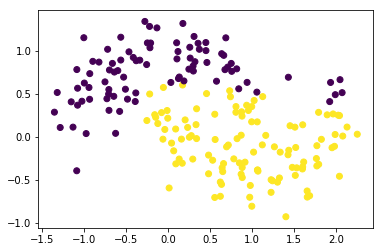

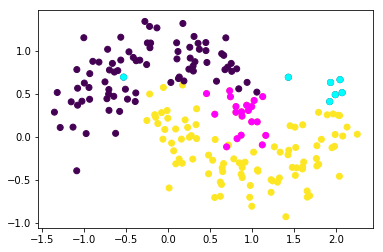

In [19]:
plt.scatter(data[:, 0], data[:, 1], c=pred)
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=pred)
pred = np.array(pred)
plt.scatter(data[nn.f_index, 0], data[nn.f_index, 1], c=pred[nn.f_index], cmap=plt.cm.cool)